In [1]:
import json
import csv
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
from mplsoccer.pitch import Pitch
import seaborn as sns
from soccerplots.radar_chart import Radar
from soccerplots.utils import add_image

In [2]:
data = pd.read_csv('chelsea.csv')

In [3]:
data

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
0,Mason Mount\Mason-Mount,eng ENG,MFFW,22-036,22,20,1798.0,20.0,3.0,3.0,...,3.0,3.0,4.0,7.0,0.15,0.20,0.35,0.15,0.35,Matches
1,Edouard Mendy\Edouard-Mendy,sn SEN,GK,28-351,19,19,1710.0,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
2,Timo Werner\Timo-Werner,de GER,FW,24-346,22,19,1650.0,18.3,4.0,5.0,...,7.5,7.5,2.8,10.3,0.41,0.15,0.56,0.41,0.56,Matches
3,Ben Chilwell\Ben-Chilwell,eng ENG,DF,24-056,18,18,1486.0,16.5,2.0,4.0,...,1.3,1.3,1.1,2.4,0.08,0.07,0.15,0.08,0.15,Matches
4,N'Golo Kanté\NGolo-Kante,fr FRA,MF,29-323,19,17,1511.0,16.8,0.0,1.0,...,0.3,0.3,0.8,1.1,0.02,0.05,0.07,0.02,0.07,Matches
5,Thiago Silva\Thiago-Silva,br BRA,DF,36-146,17,17,1457.0,16.2,2.0,0.0,...,0.8,0.8,0.2,1.0,0.05,0.01,0.06,0.05,0.06,Matches
6,Reece James\Reece-James,eng ENG,DF,21-069,17,15,1372.0,15.2,1.0,2.0,...,0.9,0.9,2.1,3.0,0.06,0.14,0.20,0.06,0.20,Matches
7,Kurt Zouma\Kurt-Zouma,fr FRA,DF,26-111,15,15,1350.0,15.0,4.0,0.0,...,1.0,1.0,0.0,1.0,0.06,0.00,0.07,0.06,0.07,Matches
8,Mateo Kovačić\Mateo-Kovacic,hr CRO,MF,26-285,18,14,1175.0,13.1,0.0,1.0,...,0.6,0.6,1.2,1.8,0.05,0.09,0.14,0.05,0.14,Matches
9,Jorginho\Jorginho,it ITA,MF,29-057,15,12,1062.0,11.8,5.0,1.0,...,5.4,0.1,1.4,1.5,0.46,0.12,0.58,0.01,0.13,Matches


In [4]:
data = data.drop(['Nation','Age','Matches'],axis=1)
data = data.drop([29,30],axis=0)
data['Goals scored']=data['Gls']
data.rename(columns={'G-PK.1':'G-PK/90','Gls.1':'Gls/90', 'Ast.1':'Ast/90','xG.1':'xG/90','npxG.1':'npxG/90','xA.1':'xA/90','npxG+xA.1':'npxG+xA/90'},inplace=True)

In [5]:
data.columns.values[12:]

array(['CrdR', 'Gls/90', 'Ast/90', 'G+A', 'G-PK/90', 'G+A-PK', 'xG',
       'npxG', 'xA', 'npxG+xA', 'xG/90', 'xA/90', 'xG+xA', 'npxG/90',
       'npxG+xA/90', 'Goals scored'], dtype=object)

In [6]:
categories = list(data.columns.values[18:])
len(categories)

10

In [7]:
valuerange=[]

for x in categories:
    data[x] = data[x].astype('int64',errors='ignore')
    valuerange.append((min(data[x]),max(data[x])*1.1))
    

In [8]:
valuerange

[(0.0, 8.25),
 (0.0, 8.25),
 (0.0, 4.4),
 (0.0, 11.330000000000002),
 (0.0, 0.561),
 (0.0, 0.35200000000000004),
 (0.0, 0.66),
 (0.0, 0.561),
 (0.0, 0.66),
 (0.0, 6.6000000000000005)]

In [9]:
data['Player']

0                     Mason Mount\Mason-Mount
1                 Edouard Mendy\Edouard-Mendy
2                     Timo Werner\Timo-Werner
3                   Ben Chilwell\Ben-Chilwell
4                    N'Golo Kanté\NGolo-Kante
5                   Thiago Silva\Thiago-Silva
6                     Reece James\Reece-James
7                       Kurt Zouma\Kurt-Zouma
8                 Mateo Kovačić\Mateo-Kovacic
9                           Jorginho\Jorginho
10                    Kai Havertz\Kai-Havertz
11        César Azpilicueta\Cesar-Azpilicueta
12                Tammy Abraham\Tammy-Abraham
13        Christian Pulisic\Christian-Pulisic
14            Antonio Rüdiger\Antonio-Rudiger
15                  Hakim Ziyech\Hakim-Ziyech
16              Olivier Giroud\Olivier-Giroud
17      Callum Hudson-Odoi\Callum-Hudson-Odoi
18    Andreas Christensen\Andreas-Christensen
19                Marcos Alonso\Marcos-Alonso
20        Kepa Arrizabalaga\Kepa-Arrizabalaga
21            Willy Caballero\Will

In [10]:
player1 = input('Select Player 1:')
player2 = input('Select Player 2: ')


Select Player 1:2
Select Player 2: 12


In [11]:
str(data.iloc[0]['Player']).split('\\')[0]

'Mason Mount'

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


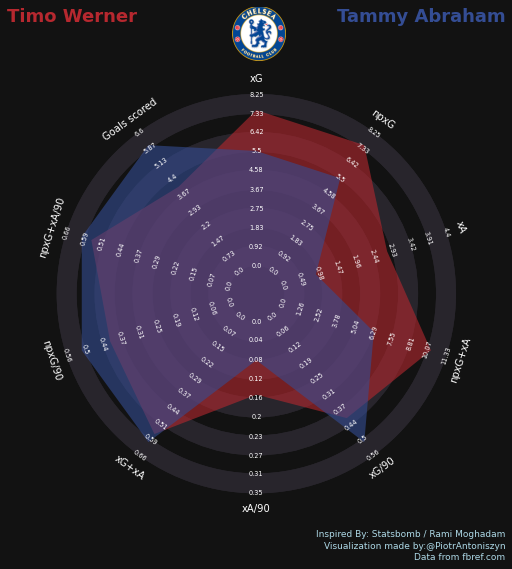

In [12]:
## instantiate object
radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#FFFFFF",
              range_color="#FFFFFF")


title = dict(
    title_name=str(data.iloc[int(player1)]['Player']).split('\\')[0],
    title_color='#B6282F',
    #subtitle_name='aka Raphinha',
    #subtitle_color='#B6282F',
    title_name_2=str(data.iloc[int(player2)]['Player']).split('\\')[0],
    title_color_2='#344D94',
    #subtitle_name_2='Fullback',
    #subtitle_color_2='#B6282F',
    title_fontsize=18,                ## fontsize for left-title
    subtitle_fontsize=15,             ## fontsize for left-subtitle
    title_fontsize_2=18,              ## fontsize for right-title
    subtitle_fontsize_2=14            ## fontsize for right-subtitle
)


## endnote 
endnote = "Visualization made by:@PiotrAntoniszyn\nData from fbref.com"
end_color = 'blue'
## plot radar
fig, ax = radar.plot_radar(ranges=valuerange, params=categories, values=[data.iloc[int(player1)][18:],data.iloc[int(player2)][18:]], 
                                 radar_color=['#B6282F', '#344D94'],title=title,compare=True,endnote=endnote,end_color = 'lightblue')

fig = add_image(image="chelsea.png", fig=fig, left=0.464, bottom=0.81, width=0.1, height=0.075)

In [13]:
data

,Player,Pos,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,...,xG,npxG,xA,npxG+xA,xG/90,xA/90,xG+xA,npxG/90,npxG+xA/90,Goals scored
0,Mason Mount\Mason-Mount,MFFW,22,20,1798.0,20.0,3.0,3.0,3.0,0.0,...,3.0,3.0,4.0,7.0,0.15,0.20,0.35,0.15,0.35,3.0
1,Edouard Mendy\Edouard-Mendy,GK,19,19,1710.0,19.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
2,Timo Werner\Timo-Werner,FW,22,19,1650.0,18.3,4.0,5.0,4.0,0.0,...,7.5,7.5,2.8,10.3,0.41,0.15,0.56,0.41,0.56,4.0
3,Ben Chilwell\Ben-Chilwell,DF,18,18,1486.0,16.5,2.0,4.0,2.0,0.0,...,1.3,1.3,1.1,2.4,0.08,0.07,0.15,0.08,0.15,2.0
4,N'Golo Kanté\NGolo-Kante,MF,19,17,1511.0,16.8,0.0,1.0,0.0,0.0,...,0.3,0.3,0.8,1.1,0.02,0.05,0.07,0.02,0.07,0.0
5,Thiago Silva\Thiago-Silva,DF,17,17,1457.0,16.2,2.0,0.0,2.0,0.0,...,0.8,0.8,0.2,1.0,0.05,0.01,0.06,0.05,0.06,2.0
6,Reece James\Reece-James,DF,17,15,1372.0,15.2,1.0,2.0,1.0,0.0,...,0.9,0.9,2.1,3.0,0.06,0.14,0.20,0.06,0.20,1.0
7,Kurt Zouma\Kurt-Zouma,DF,15,15,1350.0,15.0,4.0,0.0,4.0,0.0,...,1.0,1.0,0.0,1.0,0.06,0.00,0.07,0.06,0.07,4.0
8,Mateo Kovačić\Mateo-Kovacic,MF,18,14,1175.0,13.1,0.0,1.0,0.0,0.0,...,0.6,0.6,1.2,1.8,0.05,0.09,0.14,0.05,0.14,0.0
9,Jorginho\Jorginho,MF,15,12,1062.0,11.8,5.0,1.0,0.0,5.0,...,5.4,0.1,1.4,1.5,0.46,0.12,0.58,0.01,0.13,5.0
